In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sd = pd.read_csv('data_download.csv')
sd.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00320000,01/18/2023,320.0,C,A,72.02,...,-1.0,3,3,391.45,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00320000,01/18/2023,320.0,P,A,0.01,...,-1.0,2,239,391.45,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00323000,01/18/2023,323.0,C,A,69.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00323000,01/18/2023,323.0,P,A,0.01,...,-1.0,0,240,391.45,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00324000,01/18/2023,324.0,C,A,68.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
sd.corr()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
adjusted close,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
strike,-0.002019,1.000000,0.129505,0.130476,0.129909,-0.243756,-0.004351,-0.067207,-0.002019,-0.499914,-0.095705,-0.016708,0.180755,-0.164232
ask,-0.001416,0.129505,1.000000,0.999753,0.999935,0.206815,-0.059359,-0.165265,-0.001416,-0.056733,-0.014730,-0.234387,0.194088,0.281276
bid,-0.003028,0.130476,0.999753,1.000000,0.999939,0.208600,-0.058644,-0.163618,-0.003028,-0.058359,-0.030599,-0.232671,0.191831,0.275126
mean price,-0.002232,0.129909,0.999935,0.999939,1.000000,0.207699,-0.058995,-0.164420,-0.002232,-0.057541,-0.022617,-0.233481,0.192902,0.278234
iv,-0.014362,-0.243756,0.206815,0.208600,0.207699,1.000000,-0.184150,0.040295,-0.014362,0.165301,0.010583,-0.065846,-0.076705,0.068637
volume,-0.021158,-0.004351,-0.059359,-0.058644,-0.058995,-0.184150,1.000000,0.152201,-0.021158,-0.016329,-0.049292,0.157624,-0.150090,-0.021934
open interest,-0.005678,-0.067207,-0.165265,-0.163618,-0.164420,0.040295,0.152201,1.000000,-0.005678,-0.010502,-0.041784,0.089784,-0.113530,-0.061854
stock price for iv,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
delta,0.027822,-0.499914,-0.056733,-0.058359,-0.057541,0.165301,-0.016329,-0.010502,0.027822,1.000000,0.130459,-0.034268,-0.322506,0.459805


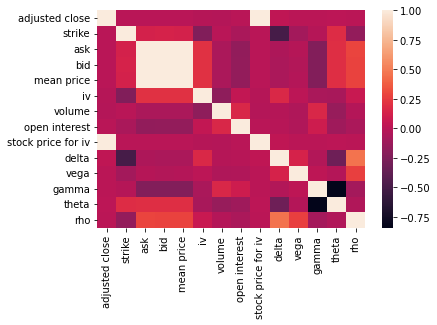

In [4]:
sns.heatmap(sd.corr());

In [5]:
strike_test = sd

In [6]:
jan17 = sd.loc[sd['date'] == '01/17/2023']
jan17 = sd.loc[sd['iv'] != -1]
jan17.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
270,SPY,NYSEArca,01/18/2023,391.49,SPY 230119C00320000,01/19/2023,320.0,C,A,71.62,...,0.832747,0,0,391.45,*,0.999998,0.000002,0.000000,-0.038285,0.008766
271,SPY,NYSEArca,01/18/2023,391.49,SPY 230119P00320000,01/19/2023,320.0,P,A,0.01,...,0.832747,0,49,391.45,*,-0.000002,0.000002,0.000000,-0.000069,-0.000000
272,SPY,NYSEArca,01/18/2023,391.49,SPY 230119C00330000,01/19/2023,330.0,C,A,61.63,...,0.832747,0,17,391.45,*,0.999960,0.000034,0.000010,-0.040844,0.009040
273,SPY,NYSEArca,01/18/2023,391.49,SPY 230119P00330000,01/19/2023,330.0,P,A,0.01,...,0.832747,0,664,391.45,*,-0.000040,0.000034,0.000010,-0.001434,-0.000000
274,SPY,NYSEArca,01/18/2023,391.49,SPY 230119C00331000,01/19/2023,331.0,C,A,60.63,...,0.832747,0,0,391.45,*,0.999946,0.000045,0.000013,-0.041410,0.009067


In [7]:
jan17[['strike','delta','iv']].to_numpy()

array([[ 3.20000e+02,  9.99998e-01,  8.32747e-01],
       [ 3.20000e+02, -2.00000e-06,  8.32747e-01],
       [ 3.30000e+02,  9.99960e-01,  8.32747e-01],
       ...,
       [ 6.45000e+02, -9.58181e-01,  2.62947e-01],
       [ 6.50000e+02,  7.85380e-02,  1.60287e-01],
       [ 6.50000e+02, -9.57987e-01,  2.66365e-01]])

In [8]:
X = sd[['strike','delta']]
y = np.ravel(sd [['iv']])

In [9]:
y.shape

(16082,)

In [10]:
# lnr = LinearRegression()
lnr = linear_model.BayesianRidge()
lnr.fit(X,y)

BayesianRidge()

In [94]:
# create test df

test_df = sd.loc[sd['date'] == '01/18/2023']
# test_df = sd.loc[sd['iv'] != -1]

test_df_x = test_df[['strike','delta']]

pred = lnr.predict(test_df_x)
print(pred)

[0.26593271 0.26593271 0.26422604 ... 0.05792926 0.07997346 0.0550848 ]


In [12]:
print(test_df['iv'])

270      0.832747
271      0.832747
272      0.832747
273      0.832747
274      0.832747
           ...   
16077    0.259529
16078    0.160973
16079    0.262947
16080    0.160287
16081    0.266365
Name: iv, Length: 15542, dtype: float64


In [13]:
jan18_comp = test_df['iv'].to_numpy()
print(jan18_comp)

[0.832747 0.832747 0.832747 ... 0.262947 0.160287 0.266365]


In [14]:
x = np.arange(1,len(jan18_comp)+1)
y = jan18_comp

x_train = np.arange(1,len(pred)+1)
y_train = pred

In [15]:
# plot graph

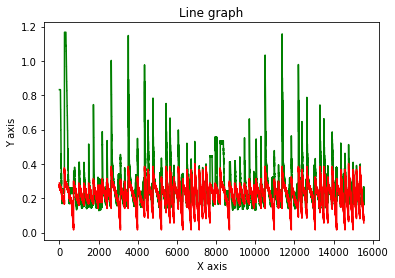

In [16]:
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.plot(x_train, y_train, color ="red")
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
X = sd[['strike','delta']]
y = np.ravel(sd [['iv']])

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

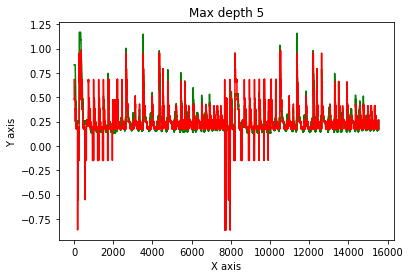

In [78]:
x = np.arange(1,len(jan18_comp)+1)
y = jan18_comp #original
y_1 = regr_1.predict(test_df_x)
y_2 = regr_2.predict(test_df_x)

plt.title("Max depth 5")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.plot(x, y_2, color ="red")
plt.show()

In [79]:
# Accuracy
# Import metrics library
from sklearn import metrics

accuracy = 100 - np.mean(metrics.mean_absolute_percentage_error(y, y_2))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.82 %.


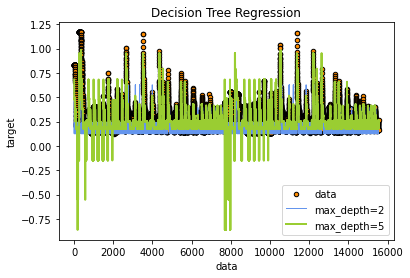

In [80]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x, y_1, color="cornflowerblue", label="max_depth=2", linewidth=1)
plt.plot(x, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [82]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X,sd[['iv']])
model.best_params_

{'n_neighbors': 5}

In [ ]:
# how to create new feature
# train['hasCabin']=train['Cabin'].apply(lambda x: 0 if x==0 else 1)
# test['hasCabin']=test['Cabin'].apply(lambda x: 0 if x==0 else 1)